<a href="https://colab.research.google.com/github/Ayeshaahmadkhan/CODSOFT/blob/main/customer-churn-prediction/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [ ]:
path='/content/drive/MyDrive/Churn_Modelling.csv'

In [ ]:
df=pd.read_csv(path)
df.head(8)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [ ]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [ ]:
df = pd.read_csv(path)
if df.isnull().values.any():
    df = df.dropna()
    print("Missing values removed. Dataset is updated.")
else:
    print("No missing values.")

print(df)

output_file_path = "/content/drive/MyDrive/updated-Churn_Modelling.csv"
df.to_csv(output_file_path, index=False)
print("Cleaned dataset saved to {output_file_path}.")

No missing values.
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasC

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/updated-Churn_Modelling.csv")
duplicate_rows = df.duplicated()

print(df[duplicate_rows])

df.drop_duplicates(inplace=True)

df.to_csv("/content/drive/MyDrive/updated-Churn_Modelling.csv", index=False)
print("Duplicate rows removed")


Duplicate rows:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Duplicate rows removed


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/updated-Churn_Modelling.csv")

df = df.drop(["CustomerId", "Surname"], axis=1)

df.to_csv("/content/drive/MyDrive/updated-Churn_Modelling.csv", index=False)
print("surname and customerid  column dropped")

surname and customerid  column dropped


In [ ]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
categorical_columns = ['Geography', 'Gender']

df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded data
print(df_encoded)
print("Encoding completed successfully.")

      RowNumber  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0             1          619   42       2       0.00              1   
1             2          608   41       1   83807.86              1   
2             3          502   42       8  159660.80              3   
3             4          699   39       1       0.00              2   
4             5          850   43       2  125510.82              1   
...         ...          ...  ...     ...        ...            ...   
9995       9996          771   39       5       0.00              2   
9996       9997          516   35      10   57369.61              1   
9997       9998          709   36       7       0.00              1   
9998       9999          772   42       3   75075.31              2   
9999      10000          792   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1               1        101348.88       1             

In [ ]:
df_encoded.head(10)

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,6,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,7,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,8,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,9,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,10,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [ ]:
df_encoded.nunique()

RowNumber            10000
CreditScore            460
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Geography_France         2
Geography_Germany        2
Geography_Spain          2
Gender_Female            2
Gender_Male              2
dtype: int64

In [ ]:
df_encoded.isnull().sum()

RowNumber            0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [ ]:
churn=len(df[df['Exited']==1])

In [ ]:
Nonchurn=len(df[df['Exited']==0])

In [ ]:
print('  customer has churned: ',churn)
print(' customer has non churned: ',Nonchurn)

  customer has churned:  2037
 customer has non churned:  7963


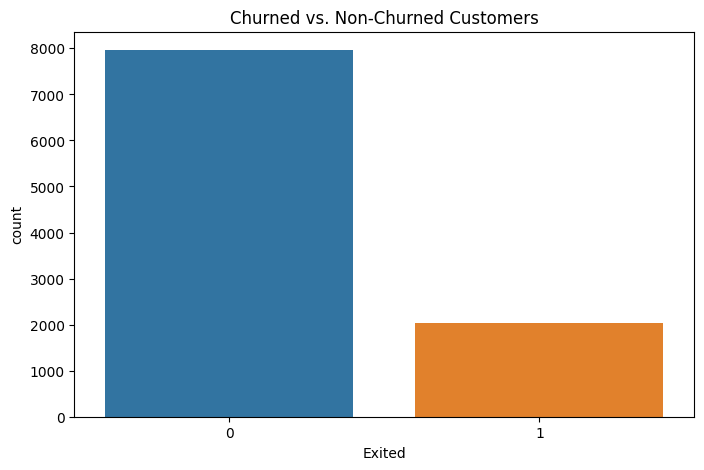

In [ ]:
churned_data = df_encoded[df_encoded['Exited'] == 1]
non_churned_data = df_encoded[df_encoded['Exited'] == 0]

plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df_encoded)
plt.title('Churned vs. Non-Churned Customers')
plt.show()


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

df_encoded = pd.get_dummies(df, columns=categorical_columns)
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42)


In [ ]:
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
Logistic_predict = model.predict(X_test)


Logistic_accuracy = accuracy_score(y_test, Logistic_predict)

print("Logistic Accuracy:", Logistic_accuracy)

Logistic Accuracy: 0.7875


In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, Logistic_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1605
           1       0.31      0.06      0.11       395

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.49      2000
weighted avg       0.71      0.79      0.73      2000



In [ ]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, Logistic_predict))


Confusion Matrix:
[[1550   55]
 [ 370   25]]


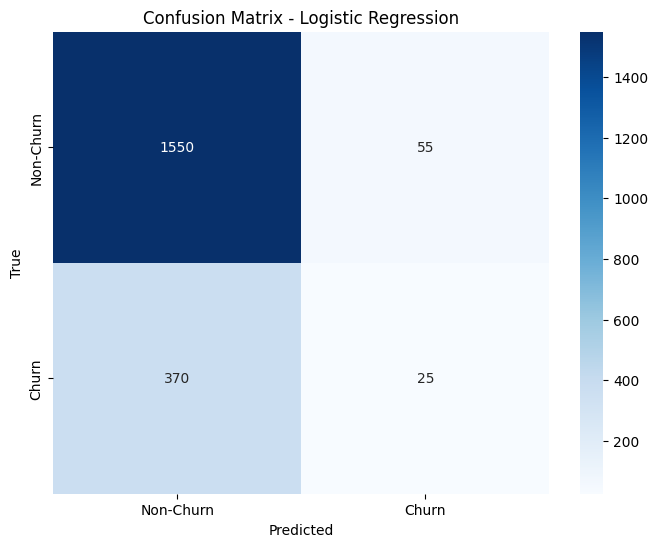

In [ ]:
Logistic_predict = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, Logistic_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gb_predict = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predict)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.875



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1605
           1       0.79      0.50      0.61       395

    accuracy                           0.88      2000
   macro avg       0.84      0.74      0.77      2000
weighted avg       0.87      0.88      0.86      2000



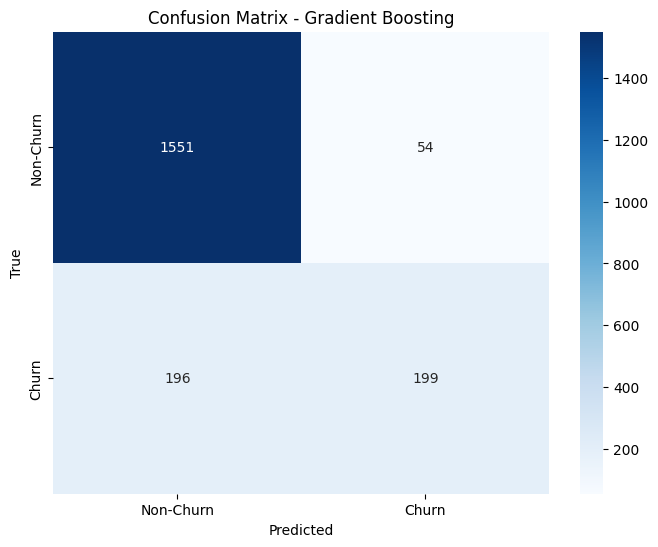

In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, gb_predict))


conf_matrix_gb = confusion_matrix(y_test, gb_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [ ]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, gb_predict))


Confusion Matrix:
[[1551   54]
 [ 196  199]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_predict = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predict)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8625


In [ ]:
print('\nClassification Report:')
print(classification_report(y_test, rf_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1605
           1       0.75      0.46      0.57       395

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



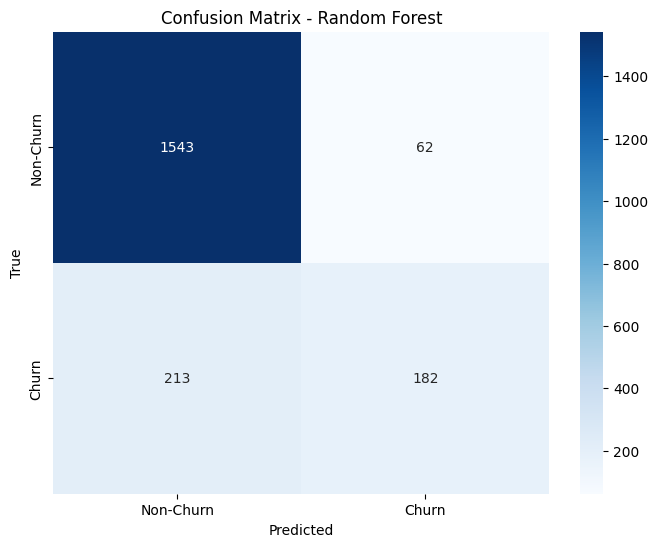

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, rf_predict))


Confusion Matrix:
[[1543   62]
 [ 213  182]]


In [ ]:
labels = ['Logistic_Reg', 'GradientBoost', 'Random_Forest']
accuracies = [Logistic_accuracy, gb_accuracy, rf_accuracy,]

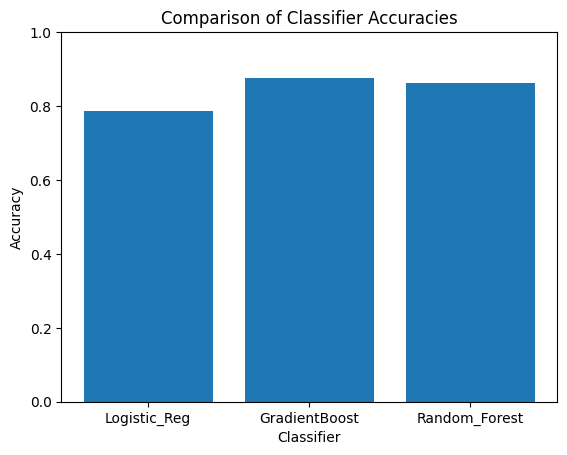

In [ ]:
plt.bar(labels, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

In [ ]:

incoming_data = {
    'CreditScore': [619],
    'Geography_France': [1],
    'Geography_Spain': [0],
    'Gender_Female': [1],
    'Gender_Male': [0],
    'Age': [42],
    'Tenure': [2],
    'Balance': [0.00],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [101348.88],
}

# Create a DataFrame for the incoming data
df_incoming = pd.DataFrame(incoming_data)

# Make sure the columns are aligned with your training data
df_incoming_aligned = df_incoming.reindex(columns=X.columns, fill_value=0)

# Make predictions using the trained Gradient Boosting model
prediction = gb_model.predict(df_incoming_aligned)

# Print the predicted label
print(prediction)


[1]
